The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology<br>

Author: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

Framework - Offloading Pipeline Processing to Amazon Demo
=====================

This notebook demonstrates offloading work to an amazon server

Initial imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14.0, 3.0)
import re

skdaccess imports

In [2]:
from skdaccess.framework.param_class import *
from skdaccess.geo.groundwater import DataFetcher as GWDF

skdiscovery imports

In [3]:
from skdiscovery.data_structure.framework import DiscoveryPipeline
from skdiscovery.data_structure.framework.stagecontainers import *
from skdiscovery.data_structure.table.filters import MedianFilter
from skdiscovery.data_structure.generic.accumulators import DataAccumulator

Configure groundwater data fetcher

In [4]:
# Setup time range
start_date = '2000-01-01'
end_date = '2015-12-31'

# Select station
station_id = 340503117104104

# Create Data Fetcher
gwdf = GWDF([AutoList([station_id])],start_date,end_date)

Create Pipeline

In [5]:
ap_window = AutoParamListCycle([1,
                                15,
                                40,
                                70,
                                150,
                                300])

fl_median = MedianFilter('Median Filter',[ap_window],interpolate=False)
sc_median = StageContainer(fl_median)


acc_data = DataAccumulator('Data Accumulator',[])
sc_data = StageContainer(acc_data)

pipeline = DiscoveryPipeline(gwdf,[sc_median, sc_data])

Display pipeline

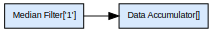

In [6]:
pipeline.plotPipelineInstance()

Run the pipeline, offloading the processing to a node on Amazon.

While running, the amazon node can display the jobs:
![Amazon Node](images/amazon_run.png)

In [7]:
pipeline.run(num_runs=6,amazon=True)

2017-09-12 14:07:29 pycos - version 4.6.1 with kqueue I/O notifier
2017-09-12 14:07:29 dispy - dispy client version: 4.8.1
2017-09-12 14:07:29 dispy - Storing fault recovery information in "_dispy_20170912140729"
Access cluster monitor at http://hostname:8181 where hostname is the address of the primary host

                           Node |  CPUs |    Jobs |    Sec/Job | Node Time Sec
------------------------------------------------------------------------------
 192.52.61.194 (dhcp194.haystac |     4 |       6 |      4.613 |        27.679

Total job time: 27.679 sec, wall time: 8.468 sec, speedup: 3.269



Plot the results

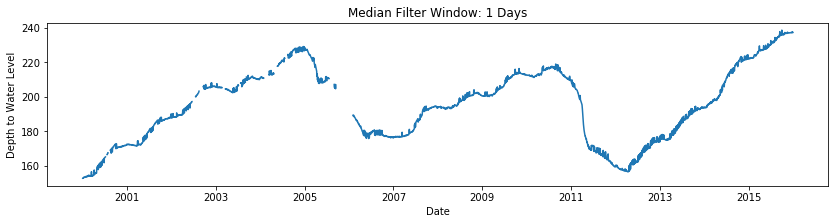

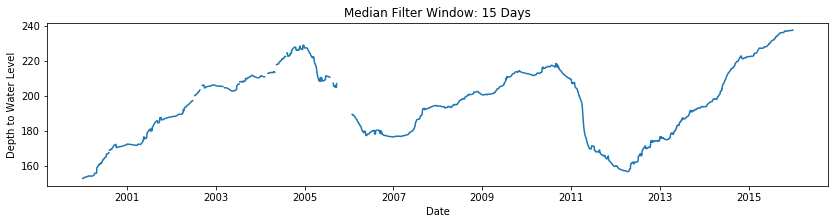

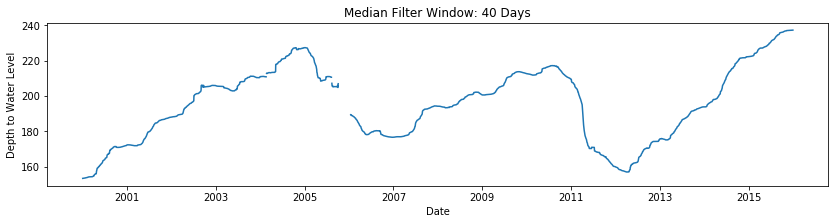

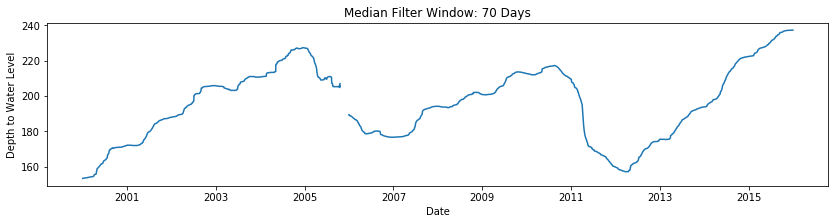

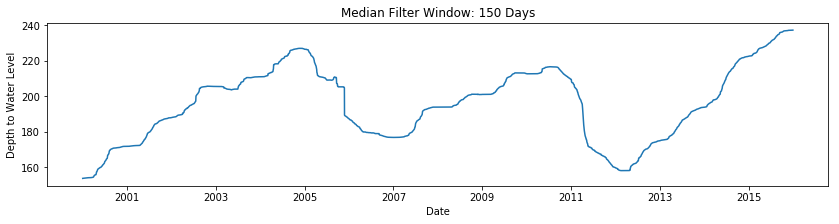

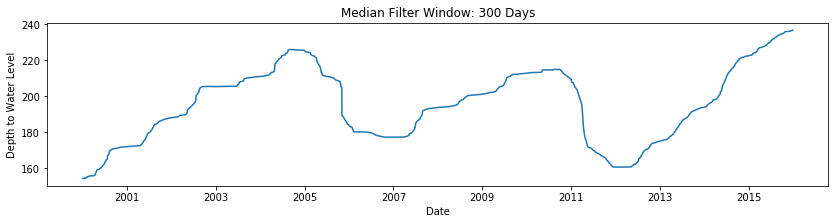

In [8]:
# Get the results
results = pipeline.getResults()
metadata = pipeline.getMetadataHistory()
# Loop over each pipeline run
for index,(run,info) in enumerate(zip(results,metadata)):
    # Plot the depth to water level
    plt.plot(run['Data Accumulator'][340503117104104].loc[:,'Median Depth to Water']);
    # Set xlabel
    plt.xlabel('Date');
    # Set ylabel
    plt.ylabel("Depth to Water Level");
    # Set title
    plt.title('Median Filter Window: ' + re.search("\[\'(.*)\'\]",info[1]).group(1) + ' Days');

    #Create new figure
    plt.figure();